In [ ]:
# Tema: Decision Trees
# Capacitador: Ebson David Allende Quintana
# Versión: 1.0
# email: david.allende@outlook.com

# Librerías necesarias

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn import linear_model,cross_validation

## Dataset

The following dataset by University of California, Irvine on the census data of the income

<table>
<tr>
    <th>Columns</th>
    <th>Descriptions</th>
</tr>
<tr>
    <td>age</td>
    <td> Edad de las personas</td>
</tr>
<tr>
    <td>workclass</td>
    <td>El tipo de empleo</td>
</tr>
<tr>
    <td>education</td>
    <td>Nivel de educación de la persona</td>
</tr>
<tr>
    <td>marital_status</td>
    <td>Estado Civil (casado = 1, otro estado = 0)</td>
</tr>
<tr>
    <td>Occupation</td>
    <td>Ocupación laboral</td>
</tr>
<tr>
    <td>relationship</td>
    <td>Tipo de relación</td>
</tr>
<tr>
    <td>race</td>
    <td>Raza de la persona</td>
</tr>
<tr>
    <td>gender</td>
    <td>Género de la persona </td>
</tr>
<tr>
    <td>hours_per_week</td>
    <td>Promedio de horas trabajadas por semana</td>
</tr>
<tr>
    <td>native_country</td>
    <td>Pais de nacimiento</td>
</tr>
<tr>
    <td>greater_than_50k</td>
    <td>Flag si la persona gana más de S/.50K anuales</td>
</tr>
</table>

Let's load the data

In [2]:
data = pd.read_csv('./Data/census.csv')
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


Let's check the fill rate of the data

In [3]:
data.count(0)/data.shape[0] * 100

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

Las variables están suficientemente pobladas. Excluiremos los registros que no tienen información completa.

In [4]:
data = data.dropna(how='any')
del data['education_num']

## Explorando los datos en bases a hipótesis de negocio

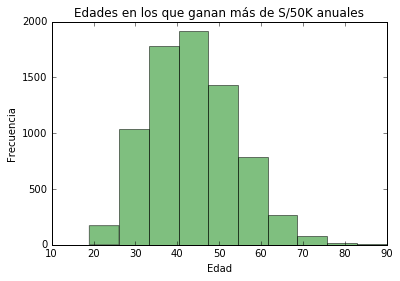

In [11]:
hist_above_50 = plt.hist(data[data.greater_than_50k == 1].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Edades en los que ganan más de S/50K anuales')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Histograma de aquellos que ganan menos de S/50K

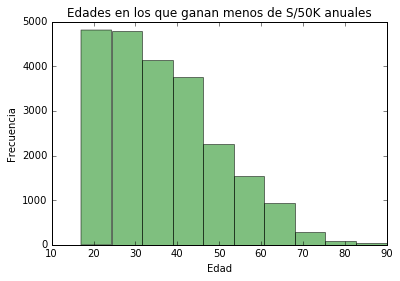

In [12]:
hist_below_50 = plt.hist(data[data.greater_than_50k == 0].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Edades en los que ganan menos de S/50K anuales')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Las personas que ganan más de S/50K anuales están más concentrados entre los 30 - 50 años. Mientras que las personas que ganan menos de S/50K anuales están entre los 20 -30 años.

<strong>Hipótesis 2: La dispersión de sueldos depende de la clase trabajadora </strong>


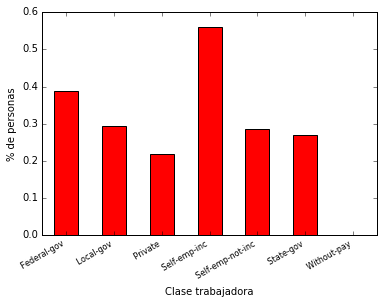

In [17]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('workclass').workclass.count()
                          , data[data.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1)

dist_data.columns = ['wk_class_gt50','wk_class_lt50']

dist_data_final = dist_data.wk_class_gt50 / (dist_data.wk_class_lt50 + dist_data.wk_class_gt50 )

dist_data_final.sort_values(ascending=False)
ax = dist_data_final.plot(kind = 'bar', color = 'r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Clase trabajadora')
ax.set_ylabel('% de personas')

Personas que trabajan para sí mismas y tienen su propia compañia tienen son el grupo mayoritario entre el grupo de los que ganan más de S/50K anuales. Seguidos de aquellos que trabajan en el gobierno.

<strong>Hipótesis 3: Personas con más educación ganan más</strong>

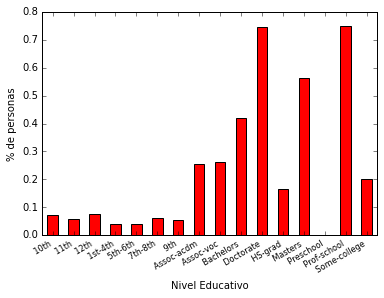

In [20]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count()
                          , data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)

dist_data.columns = ['education_gt50','education_lt50']

dist_data_final = dist_data.education_gt50 / (dist_data.education_gt50 + dist_data.education_lt50 )

dist_data_final.sort_values(ascending = False)
ax =dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Nivel Educativo')
ax.set_ylabel('% de personas')

Se verifica nuestra hipótesis, mayor nivel educativo mayores ingresos

<strong>Hipótesis 4: Las personas casadas tienden a ganar  más</strong>

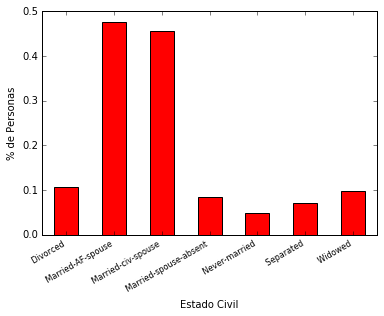

In [21]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('marital_status').marital_status.count()
                          , data[data.greater_than_50k == 0].groupby('marital_status').marital_status.count()], axis=1)

dist_data.columns = ['marital_status_gt50','marital_status_lt50']

dist_data_final = dist_data.marital_status_gt50 / (dist_data.marital_status_gt50 + dist_data.marital_status_lt50 )

dist_data_final.sort_values(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('% de Personas')

Los casados son los que representan la mayoría de personas en el grupo de mayores ingresos (>S/.50K)

<strong>Hipótesis 5: Existen diferencias en ingresos dependiendo de la ocupación </strong>

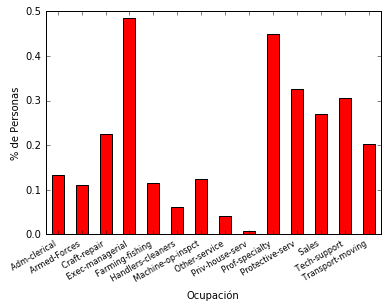

In [22]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('occupation').occupation.count()
                          , data[data.greater_than_50k == 0].groupby('occupation').occupation.count()], axis=1)

dist_data.columns = ['occupation_gt50','occupation_lt50']

dist_data_final = dist_data.occupation_gt50 / (dist_data.occupation_gt50 + dist_data.occupation_lt50 )

dist_data_final.sort_values(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Ocupación')
ax.set_ylabel('% de Personas')

Las ocupaciones de mayores ingresos son los administradores.

The Asian Pacific people and the Whites have the highest earning power 

<strong>Hipótesis 6: Los ingresos varían dependiendo del país de origen</strong>


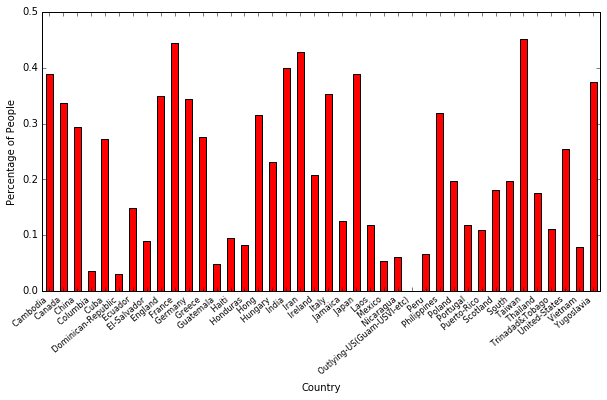

In [24]:
plt.figure(figsize=(10,5))
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('native_country').native_country.count()
                          , data[data.greater_than_50k == 0].groupby('native_country').native_country.count()], axis=1)

dist_data.columns = ['native_country_gt50','native_country_lt50']

dist_data_final = dist_data.native_country_gt50 / (dist_data.native_country_gt50 + dist_data.native_country_lt50 )

dist_data_final.sort_values(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=40, fontsize=8, ha='right')
ax.set_xlabel('Country')
ax.set_ylabel('Percentage of People')

Las personas de Taiwan, Francia, Iran son las mejores pagadas

## Decision Trees

In [25]:
#data_test = pd.read_csv('D:/Cursos/18.PEA_ML/PEA_ML/PEA_ML/0.Data/Clustering/auto-mpg.csv')

In [27]:
data_test = pd.read_csv('./Data/census_test.csv')
data_test = data_test.dropna(how='any')
formula = 'greater_than_50k ~  age + workclass + education + marital_status + occupation + race + gender + hours_per_week + native_country ' 

y_train,x_train = dmatrices(formula, data=data, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=data_test, return_type='dataframe')

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

Let's see how the model is performing

In [30]:
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)

print (pd.crosstab(y_test.greater_than_50k
                  ,y_pred
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print ('\n \n')

print (classification_report(y_test.greater_than_50k,y_pred))

Predicted   0.0   1.0
Actual               
0.0        9853  1507
1.0        1782  1918

 

             precision    recall  f1-score   support

        0.0       0.85      0.87      0.86     11360
        1.0       0.56      0.52      0.54      3700

avg / total       0.78      0.78      0.78     15060



La precisión global es 78%, en los que ganan menos de S/50K anuales es de 85% y en los que ganan más de S/.50K anuales es del 56%.

# Extraido de
# 13 - Decision Trees

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 0.1, Apr 2016

## Part of the class [Practical Machine Learning](https://github.com/albahnsen/PracticalMachineLearningClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Kevin Markham](https://github.com/justmarkham)

*Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

## Comparing regression trees and classification trees

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize Gini index (discussed below)|

## Splitting criteria for classification trees

Common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region

### Example of classification error rate

Pretend we are predicting whether someone buys an iPhone or an Android:

- At a particular node, there are **25 observations** (phone buyers), of whom **10 bought iPhones and 15 bought Androids**.
- Since the majority class is **Android**, that's our prediction for all 25 observations, and thus the classification error rate is **10/25 = 40%**.

Our goal in making splits is to **reduce the classification error rate**. Let's try splitting on gender:

- **Males:** 2 iPhones and 12 Androids, thus the predicted class is Android
- **Females:** 8 iPhones and 3 Androids, thus the predicted class is iPhone
- Classification error rate after this split would be **5/25 = 20%**

Compare that with a split on age:

- **30 or younger:** 4 iPhones and 8 Androids, thus the predicted class is Android
- **31 or older:** 6 iPhones and 7 Androids, thus the predicted class is Android
- Classification error rate after this split would be **10/25 = 40%**

The decision tree algorithm will try **every possible split across all features**, and choose the split that **reduces the error rate the most.**

### Example of Gini index

Calculate the Gini index before making a split:

$$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

- The **maximum value** of the Gini index is 0.5, and occurs when the classes are perfectly balanced in a node.
- The **minimum value** of the Gini index is 0, and occurs when there is only one class represented in a node.
- A node with a lower Gini index is said to be more "pure".

Evaluating the split on **gender** using Gini index:

$$\text{Males: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
$$\text{Females: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
$$\text{Weighted Average: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$

Evaluating the split on **age** using Gini index:

$$\text{30 or younger: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
$$\text{31 or older: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
$$\text{Weighted Average: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$

Again, the decision tree algorithm will try **every possible split**, and will choose the split that **reduces the Gini index (and thus increases the "node purity") the most.**

### Comparing classification error rate and Gini index

- Gini index is generally preferred because it will make splits that **increase node purity**, even if that split does not change the classification error rate.
- Node purity is important because we're interested in the **class proportions** in each region, since that's how we calculate the **predicted probability** of each class.
- scikit-learn's default splitting criteria for classification trees is Gini index.

Note: There is another common splitting criteria called **cross-entropy**. It's numerically similar to Gini index, but slower to compute, thus it's not as popular as Gini index.